In [1]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score,  roc_curve, confusion_matrix, classification_report
%matplotlib inline

C:\Users\dilli\AppData\Local\Temp\ipykernel_22356\3983116469.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [20]:
df = pd.read_csv("FE_Telcom.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,SEN_YNG_GENDER_FIBER_senior_male_fiber_internet,SEN_YNG_GENDER_FIBER_young_female_fiber_internet,SEN_YNG_GENDER_FIBER_young_male_fiber_internet,INT_SEC_SERV_GENDER_1,INT_SEC_SERV_GENDER_2,INT_SEC_TECH_GENDER_1,INT_SEC_TECH_GENDER_2,PARTNER_GENDER_with_partner_male,PARTNER_GENDER_without_partner_female,PARTNER_GENDER_without_partner_male
747,6425-JWTDV,0,0,1,0,0.634718,1,0,-1.514043,-0.630104,...,False,False,False,False,True,False,True,True,False,False
3547,6134-KWTBV,0,0,0,0,1.205134,1,0,-1.376095,-0.376620,...,False,False,False,False,True,False,True,False,False,True
3207,0585-EGDDA,0,0,1,0,0.308766,1,1,0.505314,0.390649,...,False,False,True,True,False,True,False,True,False,False
1697,4423-YLHDV,1,0,1,0,-0.465369,1,1,1.316381,-0.036641,...,False,True,False,False,True,False,False,False,False,False
1928,1964-SVLEA,0,0,0,0,-0.506113,1,1,-1.499084,-0.823874,...,False,False,False,False,True,False,True,False,False,True


In [21]:
df.dtypes

customerID                                           object
gender                                                int64
SeniorCitizen                                         int64
Partner                                               int64
Dependents                                            int64
tenure                                              float64
PhoneService                                          int64
PaperlessBilling                                      int64
MonthlyCharges                                      float64
TotalCharges                                        float64
Churn                                                 int64
MultipleLines_No phone service                         bool
MultipleLines_Yes                                      bool
InternetService_Fiber optic                            bool
InternetService_No                                     bool
OnlineSecurity_No internet service                     bool
OnlineSecurity_Yes                      

In [24]:
X = df.drop(["customerID","Churn"], axis=1)
y=df['Churn']

In [23]:
X.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,SEN_YNG_GENDER_FIBER_senior_male_fiber_internet,SEN_YNG_GENDER_FIBER_young_female_fiber_internet,SEN_YNG_GENDER_FIBER_young_male_fiber_internet,INT_SEC_SERV_GENDER_1,INT_SEC_SERV_GENDER_2,INT_SEC_TECH_GENDER_1,INT_SEC_TECH_GENDER_2,PARTNER_GENDER_with_partner_male,PARTNER_GENDER_without_partner_female,PARTNER_GENDER_without_partner_male
1532,1,0,1,1,1.612573,1,1,0.470412,1.520707,False,...,False,False,False,False,True,False,True,False,False,False
730,0,0,0,0,-1.117272,1,0,-1.477478,-0.966443,False,...,False,False,False,False,True,False,True,False,False,True
4083,1,0,0,1,-1.280248,1,0,-0.495223,-0.985348,False,...,False,False,False,False,True,False,True,False,True,False


In [26]:
for col in X:
    print(f'{col}: {X[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [-1.28024804  0.06430269 -1.23950408  0.51248626 -0.99504031 -0.42462485
 -0.91355239 -0.18016108  1.2051336  -0.7913205  -0.66908862  1.04215776
  0.6754621  -0.30239297  1.49034133  0.79769399  1.57182925 -0.46536881
 -0.83206446 -0.09867316  0.59397418  1.61257321 -0.62834466 -0.22090504
 -1.11727219  0.55323022 -0.87280842  1.53108529  1.24587756  0.43099834
 -0.70983258  1.12364568 -0.5876007   1.36810945 -0.95429635 -1.19876011
 -0.0579292   0.71620607  1.28662152  0.96066983 -1.03578427  0.39025438
  0.10504665  0.63471814 -0.13941712  1.32736548  0.22727853  1.44959737
 -0.01718524  0.91992587  0.18653457  0.14579061  0.34951041 -1.07652823
 -1.15801615  0.02355872  1.40885341 -0.38388089  1.00141379  1.16438964
 -0.75057654 -0.50611277  0.83843795  0.30876645  1.08290172 -0.34313693
  0.4717423  -0.54685673  0.87918191  0.75695003 -0.26164901  0.26802249]
PhoneService: [0 1]
PaperlessBilling: [1 0]
Mon

### One hot encoding for categorical columns

In [28]:
columns = [x for x in X.columns if X.dtypes[x] == bool]
print(columns)

['MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'SENIOR/YOUNG_GENDER_senior_male', 'SENIOR/YOUNG_GENDER_young_female', 'SENIOR/YOUNG_GENDER_young_male', 'PHONE_SER_GENDER_no_phone_ser_male', 'PHONE_SER_GENDER_phone_ser_male', 'PHONE_SER_GENDER_phone_service_female', 'DEPEND_GENDER_dependent_male', 'DEPEND_GENDER_undependent_female', 'DEPEND_GENDER_undependent_male', 'PHONE_LINE_GENDER_multiple_lines__male', 'PHONE_LINE_GENDER_no_line__fem

In [29]:
# Converting selected boolean columns to uint
X[columns] = X[columns].astype('uint8')

In [30]:
for col in X:
    print(f'{col}: {X[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [-1.28024804  0.06430269 -1.23950408  0.51248626 -0.99504031 -0.42462485
 -0.91355239 -0.18016108  1.2051336  -0.7913205  -0.66908862  1.04215776
  0.6754621  -0.30239297  1.49034133  0.79769399  1.57182925 -0.46536881
 -0.83206446 -0.09867316  0.59397418  1.61257321 -0.62834466 -0.22090504
 -1.11727219  0.55323022 -0.87280842  1.53108529  1.24587756  0.43099834
 -0.70983258  1.12364568 -0.5876007   1.36810945 -0.95429635 -1.19876011
 -0.0579292   0.71620607  1.28662152  0.96066983 -1.03578427  0.39025438
  0.10504665  0.63471814 -0.13941712  1.32736548  0.22727853  1.44959737
 -0.01718524  0.91992587  0.18653457  0.14579061  0.34951041 -1.07652823
 -1.15801615  0.02355872  1.40885341 -0.38388089  1.00141379  1.16438964
 -0.75057654 -0.50611277  0.83843795  0.30876645  1.08290172 -0.34313693
  0.4717423  -0.54685673  0.87918191  0.75695003 -0.26164901  0.26802249]
PhoneService: [0 1]
PaperlessBilling: [1 0]
Mon

In [31]:
X.dtypes

gender                                                int64
SeniorCitizen                                         int64
Partner                                               int64
Dependents                                            int64
tenure                                              float64
PhoneService                                          int64
PaperlessBilling                                      int64
MonthlyCharges                                      float64
TotalCharges                                        float64
MultipleLines_No phone service                        uint8
MultipleLines_Yes                                     uint8
InternetService_Fiber optic                           uint8
InternetService_No                                    uint8
OnlineSecurity_No internet service                    uint8
OnlineSecurity_Yes                                    uint8
OnlineBackup_No internet service                      uint8
OnlineBackup_Yes                        

# Test Train Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state= 2)

In [33]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size= 0.2, random_state= 8)

In [34]:
print(X_train.shape)
print(X_test.shape)

(4922, 58)
(2110, 58)


In [35]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,SEN_YNG_GENDER_FIBER_senior_male_fiber_internet,SEN_YNG_GENDER_FIBER_young_female_fiber_internet,SEN_YNG_GENDER_FIBER_young_male_fiber_internet,INT_SEC_SERV_GENDER_1,INT_SEC_SERV_GENDER_2,INT_SEC_TECH_GENDER_1,INT_SEC_TECH_GENDER_2,PARTNER_GENDER_with_partner_male,PARTNER_GENDER_without_partner_female,PARTNER_GENDER_without_partner_male
6523,1,1,0,0,-0.587601,1,0,-1.477478,-0.844301,0,...,0,0,0,0,1,0,1,0,1,0
4826,0,0,1,1,1.408853,1,0,-1.334544,-0.292441,0,...,0,0,0,0,1,0,1,1,0,0
3851,0,0,0,0,0.593974,1,1,0.736335,0.818667,0,...,0,0,0,0,1,0,1,0,0,1
6422,0,0,0,0,-0.628345,1,0,-1.517367,-0.855838,0,...,0,0,0,0,1,0,1,0,0,1
454,1,0,1,0,1.164390,1,0,-1.342854,-0.381804,0,...,0,0,0,0,1,0,1,0,0,0
3240,1,0,1,1,-0.383881,1,0,0.631628,-0.168997,0,...,0,1,0,0,0,0,1,0,0,0
2854,0,1,1,0,1.531085,1,1,0.789520,1.774985,0,...,0,0,0,0,1,0,1,1,0,0
6337,0,1,1,1,-1.280248,1,1,-0.516829,-0.985635,0,...,0,0,0,0,1,0,1,1,0,0
645,0,0,0,0,-1.280248,1,1,-0.634833,-0.987201,0,...,0,0,0,0,1,0,1,0,0,1
4364,0,0,1,1,-0.791321,1,0,-1.339530,-0.855772,0,...,0,0,0,0,1,0,1,1,0,0


# ANN Model

In [49]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(58,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

# Predict probabilities for the positive class
y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate confusion matrix
y_pred_class = np.round(y_pred_prob)
cm = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])
# Print numerical values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

Epoch 1/100


c:\Users\dilli\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7514 - loss: 0.4898
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8059 - loss: 0.4228
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8094 - loss: 0.4171
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7965 - loss: 0.4349
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8172 - loss: 0.4039
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8003 - loss: 0.4162
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8121 - loss: 0.4026
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8096 - loss: 0.4110
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8080 - loss: 0.4066
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8084 - loss: 0.4146
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8242 - loss: 0.3983
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

# ANN Model 2

Epoch 1/100


c:\Users\dilli\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7389 - loss: 0.5662
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7929 - loss: 0.4267
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8085 - loss: 0.4077
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8187 - loss: 0.3936
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8109 - loss: 0.4109
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8232 - loss: 0.3962
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8193 - loss: 0.3944
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8167 - loss: 0.3937
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8251 - loss: 0.3893
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8184 - loss: 0.3901
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8148 - loss: 0.3998
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

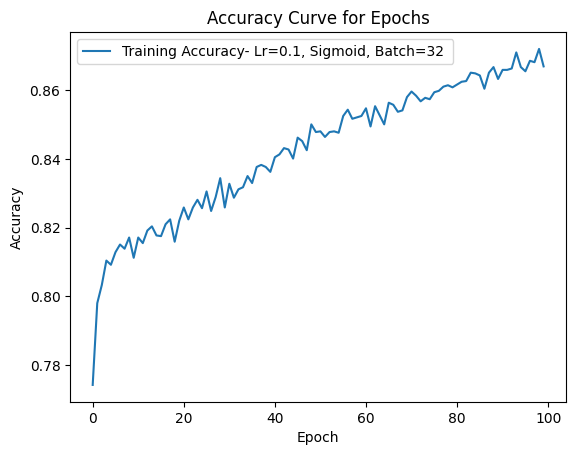

In [50]:
import tensorflow as tf
from tensorflow import keras


model2 = keras.Sequential([
    keras.layers.Dense(26, input_shape=(58,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.001)

model2.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, batch_size=32, epochs=100)

# Plot the accuracy curve
plt.plot(history2.history['accuracy'], label='Training Accuracy- Lr=0.1, Sigmoid, Batch=32 ')
#plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve for Epochs')
plt.legend()
plt.show()
# Predict probabilities for the positive class
y_pred_prob = model2.predict(X_test)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate confusion matrix
y_pred_class = np.round(y_pred_prob)
cm = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])
# Print numerical values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

Epoch 1/100


c:\Users\dilli\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7166 - loss: 0.5139
Epoch 2/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8037 - loss: 0.4142
Epoch 3/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8139 - loss: 0.4044
Epoch 4/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7966 - loss: 0.4254
Epoch 5/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8158 - loss: 0.3994
Epoch 6/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8048 - loss: 0.4110
Epoch 7/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8194 - loss: 0.3862
Epoch 8/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8157 - loss: 0.4031
Epoch 9/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8105 - loss: 0.3982
Epoch 10/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8136 - loss: 0.4010
Epoch 11/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8105 - loss: 0.3984
Epoch 12/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

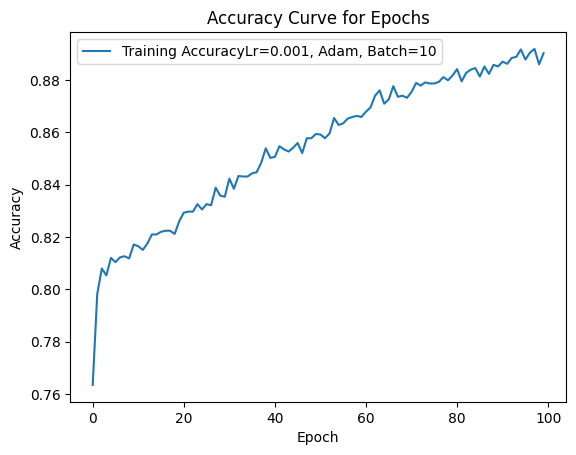

In [39]:
import tensorflow as tf
from tensorflow import keras


model3 = keras.Sequential([
    keras.layers.Dense(26, input_shape=(58,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.001)

model3.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(X_train, y_train, batch_size=10, epochs=100)

# Plot the accuracy curve
plt.plot(history3.history['accuracy'], label='Training AccuracyLr=0.001, Adam, Batch=10')
#plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve for Epochs')
plt.legend()
plt.show()

# Predict probabilities for the positive class
y_pred_prob = model3.predict(X_test)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate confusion matrix
y_pred_class = np.round(y_pred_prob)
cm = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])
# Print numerical values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

# ANN model 4

Epoch 1/100


c:\Users\dilli\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3233 - loss: 0.7157
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6766 - loss: 0.6750
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7305 - loss: 0.6289
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7296 - loss: 0.5820
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7320 - loss: 0.5545
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7245 - loss: 0.5384
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7245 - loss: 0.5208
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7288 - loss: 0.4939
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7406 - loss: 0.4797
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7714 - loss: 0.4734
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7801 - loss: 0.4583
Epoch 12/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7868 - lo

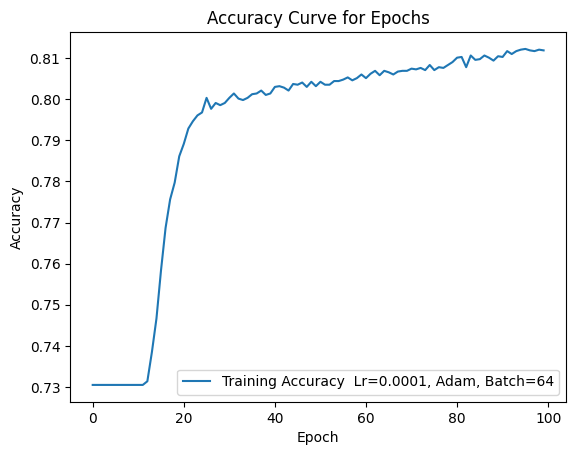

In [105]:
import tensorflow as tf
from tensorflow import keras


model4 = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
lr=0.0001
batch_size=64
opt = keras.optimizers.Adam(learning_rate=lr)

model3.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history4 = model4.fit(X_train1, y_train1, batch_size=batch_size, epochs=100)

# Plot the accuracy curve
plt.plot(history4.history['accuracy'], label=f'Training Accuracy  Lr={lr}, Adam, Batch={batch_size}')
#plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve for Epochs')
plt.legend()
plt.show()

# Predict probabilities for the positive class
y_pred_prob = model4.predict(X_test)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate confusion matrix
y_pred_class = np.round(y_pred_prob)
cm = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])
# Print numerical values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

# ANN model 5

Epoch 1/100


c:\Users\dilli\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7685 - loss: 0.4834
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7872 - loss: 0.4294
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8019 - loss: 0.4372
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7984 - loss: 0.4272
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7871 - loss: 0.4365
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8047 - loss: 0.4155
Epoch 7/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8110 - loss: 0.4140
Epoch 8/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8128 - loss: 0.4067
Epoch 9/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7986 - loss: 0.4287
Epoch 10/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7969 - loss: 0.4254
Epoch 11/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8097 - loss: 0.4089
Epoch 12/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

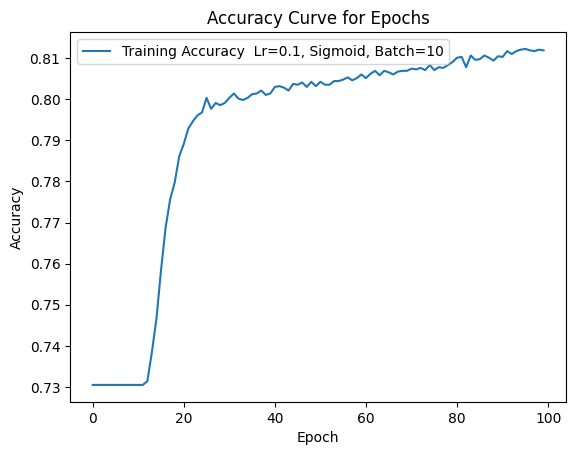

In [107]:
import tensorflow as tf
from tensorflow import keras


model5 = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    #keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
lr=0.1
batch_size=10
opt = keras.optimizers.SGD(learning_rate=lr)

model5.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history5 = model4.fit(X_train1, y_train1, batch_size=batch_size, epochs=100)

# Plot the accuracy curve
plt.plot(history2.history['accuracy'], label=f'Training Accuracy  Lr={lr}, Sigmoid, Batch={batch_size}')
#plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve for Epochs')
plt.legend()
plt.show()

# Predict probabilities for the positive class
y_pred_prob = model5.predict(X_test)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate confusion matrix
y_pred_class = np.round(y_pred_prob)
cm = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])
# Print numerical values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

In [40]:
#print(model.evaluate(X_test, y_test))
print(model2.evaluate(X_test, y_test))
#print(model3.evaluate(X_test1, y_test1))
#print(model4.evaluate(X_test1, y_test1))

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7427 - loss: 0.7793 
[0.7994766235351562, 0.7440758347511292]


In [41]:
#yp = model.predict(X_test)
yp2 = model2.predict(X_test)
# yp3 = model3.predict(X_test)
# yp4 = model4.predict(X_test)
# yp[:5]
# yp2[:5]
# yp3[:5]
# yp4[:5]

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [42]:
y_pred = []
for element in yp2:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [117]:
y_pred2 = []
for element in yp2:
    if element > 0.5:
        y_pred2.append(1)
    else:
        y_pred2.append(0)

In [43]:
y_pred[:10]

[1, 0, 0, 0, 1, 0, 0, 0, 1, 0]

In [44]:
y_test[:10]

3530    0
5795    0
3290    0
3535    0
489     0
4796    0
1599    0
6507    1
3675    1
2821    0
Name: Churn, dtype: int64

In [45]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1540
           1       0.53      0.49      0.51       570

    accuracy                           0.74      2110
   macro avg       0.67      0.66      0.67      2110
weighted avg       0.74      0.74      0.74      2110



Text(95.72222222222221, 0.5, 'Truth')

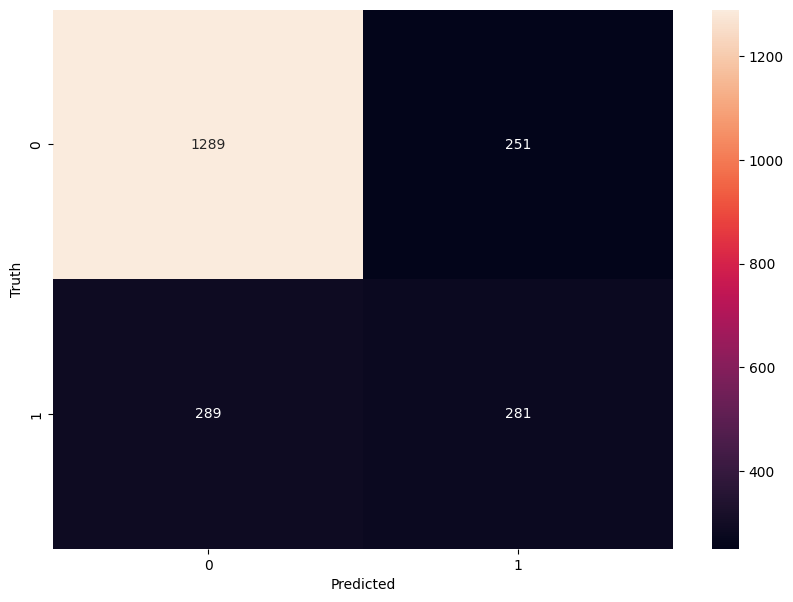

In [47]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Accuracy

In [48]:
round((1289+281)/(1289+281+289+251),2)

0.74